In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re 
pd.set_option("display.max_colwidth", 200) 
import nltk 
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")
from time import process_time

Loading Dataset

In [2]:
working_dir_path = 'IMDB.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')
#df=pd.read_csv(working_dir_path, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, engine=None)
df.head()

,id number,original title,category,director/creator,movie lenght,movie date,author,review date,review title,review,url,label,Sentiment
0,0.0,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,dwnpiyush-336-40603,08-Apr-12,"For those who don't mind a slow pacing to their movies, and can digest a theme involving supernatural elements, Lekin is a very good watch.","""Yaara Sili Sili Virah Ki Raat Ka Jalna""'Lekin' is a movie best remembered for this timeless song by Lata Mangeshkar. Directed by Gulzar and produced by the nightingale of Bollywood herself (along...",https://www.imdb.com/title/tt00100002/?ref_=tt_urv,8.0,Positive
1,1.0,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,cseabhi,10-Jul-21,Lekin - Gulzar's haunting masterpiece,Gulzar is at his best when he is telling such an intriiguing story with such ease and perfection. Dimple Kapadia's mystery character and Vinod Khanna's performance kept me mesmerized.Lekin is the ...,https://www.imdb.com/title/tt00100002/?ref_=tt_urv,9.0,Positive
2,2.0,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,abbott32,02-Jul-04,Haunting film but would love to have been able to understand the lyrics.,"I was completely mesmerized by Lekin and especially by the castle and Dimple's haunting character who took over the screen whenever she materialized. It brought back memories of Ugetsu, one of my ...",https://www.imdb.com/title/tt00100002/?ref_=tt_urv,9.0,Positive
3,3.0,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,monoglot,29-Nov-05,An intriguing story well told.,"Greatly enjoyed the development of the story line, the music and, not least, the acting. Lekin is very good work by done by experienced professionals. Dimple K. completely inhabited the character ...",https://www.imdb.com/title/tt00100002/?ref_=tt_urv,9.0,Positive
4,4.0,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,Kammu,27-Nov-99,It's a classic,"The lines of time are very blurry. Past, present and the future are merged into one another in a very fascinating manner. So are the lines of conventional philosophies. What is life? What is death...",https://www.imdb.com/title/tt00100002/?ref_=tt_urv,10.0,Positive


Assessing Dataset

In [3]:
df = df[:320747]

In [4]:
df.shape

(320747, 13)

In [5]:
df.columns

Index(['id number', 'original title', 'category', 'director/creator',
       'movie lenght', 'movie date', 'author', 'review date', 'review title',
       'review', 'url', 'label', 'Sentiment'],
      dtype='object')

Positive    186757
Negetive     75030
Neutral      58960
Name: Sentiment, dtype: int64

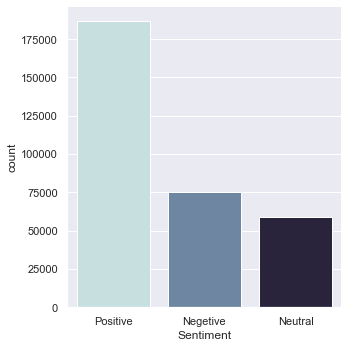

In [6]:
sns.set(font_scale=1)
sns.catplot("Sentiment", data=df, kind="count", palette="ch:start=.2,rot=-.3", height=5)
df['Sentiment'].value_counts()

Removing @user, HTTP and URLs

In [7]:
def eliminate(ip_txt, seq):
    t = re.findall(seq, ip_txt)
    for i in t:
        ip_txt = re.sub(i,'',ip_txt)
    return ip_txt
# new column with removed @user
df['new_review'] = df['review'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

Removing Punctuation marks, numbers, and special characters

In [8]:
df['new_review'] = df['new_review'].str.replace('[^a-zA-Z#]+',' ')

Removing short words

In [9]:
df['new_review'] = df['new_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

Tokenization

In [10]:
# create new variable tokenized tweet 
neww_review = df['new_review'].apply(lambda x: x.split())

Stemming

In [11]:
s = PorterStemmer()

# apply stemmer for tokenized tweet
neww_review = neww_review.apply(lambda x: [s.stem(i) for i in x])

# join tokens into one sentence
for i in range(len(neww_review)):
    neww_review[i] = ' '.join(neww_review[i])
df['new_review']  = neww_review
comp = df[['review', 'new_review']]
comp.head(5)

,review,new_review
0,"""Yaara Sili Sili Virah Ki Raat Ka Jalna""'Lekin' is a movie best remembered for this timeless song by Lata Mangeshkar. Directed by Gulzar and produced by the nightingale of Bollywood herself (along...",yaara sili sili virah raat jalna lekin movi best rememb for thi timeless song lata mangeshkar direct gulzar and produc the nightingal bollywood herself along with her brother hridyanath mangeshkar...
1,Gulzar is at his best when he is telling such an intriiguing story with such ease and perfection. Dimple Kapadia's mystery character and Vinod Khanna's performance kept me mesmerized.Lekin is the ...,gulzar hi best when tell such intriigu stori with such eas and perfect dimpl kapadia mysteri charact and vinod khanna perform kept mesmer lekin the stori samir yogi vinod khanna who assign job eva...
2,"I was completely mesmerized by Lekin and especially by the castle and Dimple's haunting character who took over the screen whenever she materialized. It brought back memories of Ugetsu, one of my ...",wa complet mesmer lekin and especi the castl and dimpl haunt charact who took over the screen whenev she materi brought back memori ugetsu one favorit japanes film the photographi the music stori ...
3,"Greatly enjoyed the development of the story line, the music and, not least, the acting. Lekin is very good work by done by experienced professionals. Dimple K. completely inhabited the character ...",greatli enjoy the develop the stori line the music and not least the act lekin veri good work done experienc profession dimpl complet inhabit the charact reva while vinod khanna creat imag benevol...
4,"The lines of time are very blurry. Past, present and the future are merged into one another in a very fascinating manner. So are the lines of conventional philosophies. What is life? What is death...",the line time are veri blurri past present and the futur are merg into one anoth veri fascin manner are the line convent philosophi what life what death where doe one end and the other begin what ...


Extracting Features from cleaned dataset

In [12]:
new_df = df[['new_review','Sentiment']]

Removing Stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['new_review'].apply(lambda x: [item for item in x if item not in stop])

0         [r,  , l,  , l,  , v, r, h,  , r,  , j, l, n,  , l, e, k, n,  , v,  , b, e,  , r, e, e, b,  , f, r,  , h,  , e, l, e,  , n, g,  , l,  , n, g, e, h, k, r,  , r, e, c,  , g, u, l, z, r,  , n,  , p, ...
1         [g, u, l, z, r,  , h,  , b, e,  , w, h, e, n,  , e, l, l,  , u, c, h,  , n, r, g, u,  , r,  , w, h,  , u, c, h,  , e,  , n,  , p, e, r, f, e, c,  , p, l,  , k, p,  , e, r,  , c, h, r, c,  , n,  , ...
2         [w,  , c, p, l, e,  , e, e, r,  , l, e, k, n,  , n,  , e, p, e, c,  , h, e,  , c, l,  , n,  , p, l,  , h, u, n,  , c, h, r, c,  , w, h,  , k,  , v, e, r,  , h, e,  , c, r, e, e, n,  , w, h, e, n, ...
3         [g, r, e, l,  , e, n, j,  , h, e,  , e, v, e, l, p,  , h, e,  , r,  , l, n, e,  , h, e,  , u, c,  , n,  , n,  , l, e,  , h, e,  , c,  , l, e, k, n,  , v, e, r,  , g,  , w, r, k,  , n, e,  , e, x, ...
4         [h, e,  , l, n, e,  , e,  , r, e,  , v, e, r,  , b, l, u, r, r,  , p,  , p, r, e, e, n,  , n,  , h, e,  , f, u, u, r,  , r, e,  , e, r, g,  , n,  , n,

Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [15]:
train, test = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) 
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (256597, 2)
Test shape :  (64150, 2)


In [16]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.new_review.values)
X_test = vectorizer.transform(test.new_review.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (256597, 157488)
X_test.shape :  (64150, 157488)
y_train.shape :  (256597,)
y_test.shape :  (64150,)


MULTICLASS Classification

1)Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

train_start_time = process_time()
naiveByes_clf.fit(X_train, y_train)
train_end_time = process_time()
print(f"Training time : {train_end_time-train_start_time}")

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test, NB_prediction)
print("Training accuracy Score    : ", naiveByes_clf.score(X_train, y_train))
print("Testing accuracy Score : ", NB_accuracy )
print(classification_report(NB_prediction, y_test))

Training time : 1.078125
Training accuracy Score    :  0.7344474019571546
Testing accuracy Score :  0.691862821512081
              precision    recall  f1-score   support

    Negetive       0.73      0.60      0.66     18330
     Neutral       0.33      0.40      0.36      9713
    Positive       0.79      0.82      0.80     36107

    accuracy                           0.69     64150
   macro avg       0.62      0.61      0.61     64150
weighted avg       0.70      0.69      0.70     64150



2)Stochastic Gradient Descent-SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

train_start_time = process_time()
sgd_clf.fit(X_train,y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train, y_train))
print("Testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training time : 21.96875
Training accuracy Score    :  0.8005042927236093
Testing accuracy Score :  0.7392049883086516
              precision    recall  f1-score   support

    Negetive       0.71      0.70      0.71     15227
     Neutral       0.21      0.49      0.30      5160
    Positive       0.92      0.78      0.84     43763

    accuracy                           0.74     64150
   macro avg       0.61      0.66      0.62     64150
weighted avg       0.81      0.74      0.77     64150



3) Random Forest Classifier

In [24]:
rf_clf = RandomForestClassifier()

train_start_time = process_time()
rf_clf.fit(X_train, y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training time : 7669.4375
Training accuracy Score    :  0.999855805017206
Testing accuracy Score :  0.6829929851909587
              precision    recall  f1-score   support

    Negetive       0.40      0.86      0.55      7014
     Neutral       0.06      0.95      0.12       759
    Positive       0.99      0.66      0.79     56377

    accuracy                           0.68     64150
   macro avg       0.49      0.82      0.48     64150
weighted avg       0.92      0.68      0.76     64150



4) Logistic Regression

In [26]:
logreg = LogisticRegression()

train_start_time = process_time()
logreg.fit(X_train, y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train, y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction, y_test))

Training time : 225.34375
Training accuracy Score    :  0.7804962645705132
Testing accuracy Score :  0.7390335151987529
              precision    recall  f1-score   support

    Negetive       0.69      0.72      0.71     14350
     Neutral       0.28      0.47      0.35      7099
    Positive       0.90      0.79      0.84     42701

    accuracy                           0.74     64150
   macro avg       0.63      0.66      0.63     64150
weighted avg       0.79      0.74      0.76     64150



Test Accuracies

In [27]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
3,Stochastic Gradient Decent,0.739205
0,Logistic Regression,0.739034
2,Naive Bayes,0.691863
1,Random Forest,0.682993


Understanding the emotions of people.

a) What are they feeling negetive about?

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


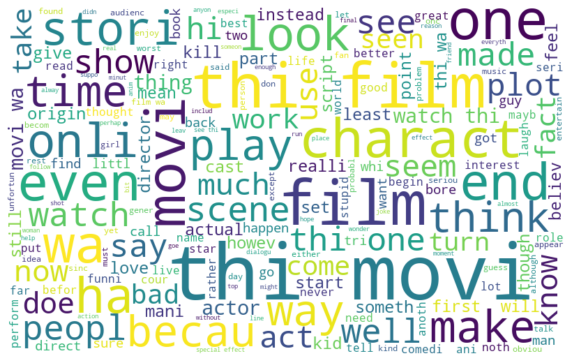

In [40]:
# import numpy as npy
# from PIL import Image

from wordcloud import WordCloud
# create text from just normal tweets
normal_words = ' '.join([text for text in new_df['new_review'][new_df['Sentiment'] == 'Negetive']])

# mask_virus = npy.array(Image.open('/content/drive/MyDrive/NLP Group Project/Mask.png'))
wordcloud = WordCloud(width=800, height=500, background_color = 'white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


b) What are they feeling positive about?

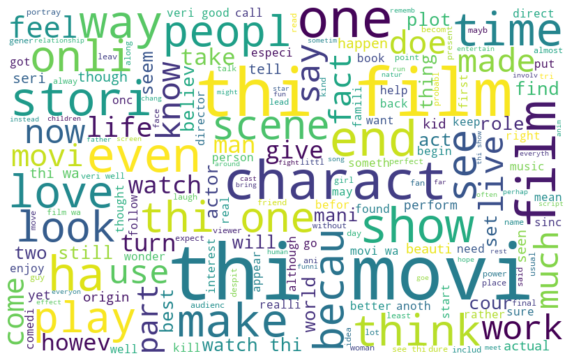

In [38]:
# create text from just normal tweets
normal_words = ' '.join([text for text in new_df['new_review'][new_df['Sentiment'] == 'Positive']])

# mask_virus = npy.array(Image.open('/content/drive/MyDrive/NLP Group Project/Mask.png'))
wordcloud = WordCloud(width=800, height=500, background_color = 'white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Chart for negative words

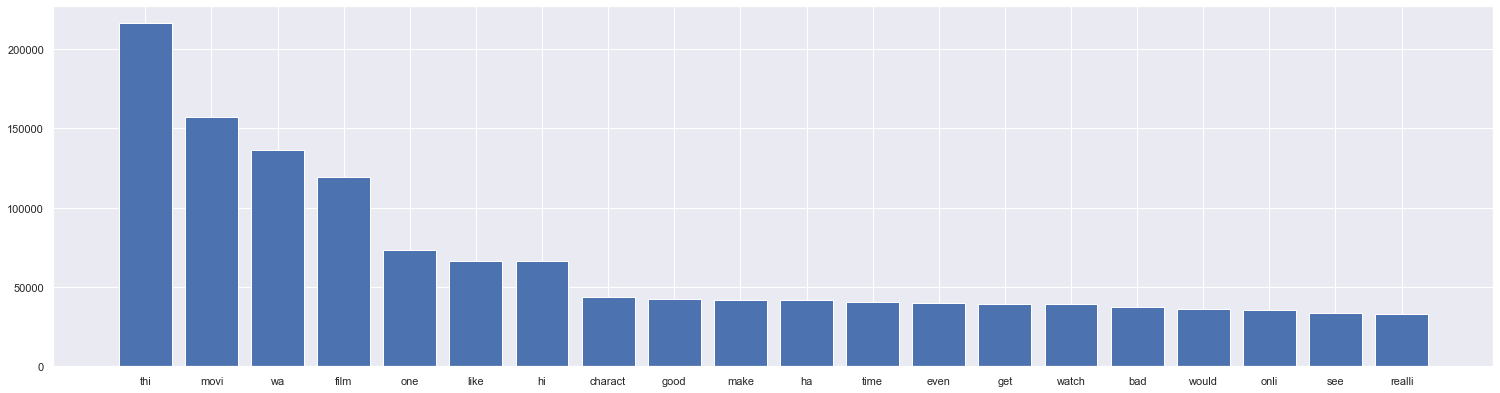

In [41]:
neg_words = ' '.join([text for text in new_df['new_review'][new_df['Sentiment'] == 'Negetive']]).split()

neg_words_freq = {}
stop = list(stopwords.words('english'))


for word in neg_words:
  if word not in stop:
    if word not in neg_words_freq:
      neg_words_freq[word] = 1
    else:
      neg_words_freq[word] += 1


neg_words_freq = sorted(neg_words_freq.items(), key=lambda neg_words_freq: neg_words_freq[1], reverse=True)


neg_words_freq = neg_words_freq[:20]

plt.rcParams["figure.figsize"] = (20,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
freqs = []
values = []

for idx,value in enumerate(neg_words_freq):
  freqs.append(value[0])
  values.append(value[1])

ax.bar(freqs,values)
plt.show()

Chart for positive words

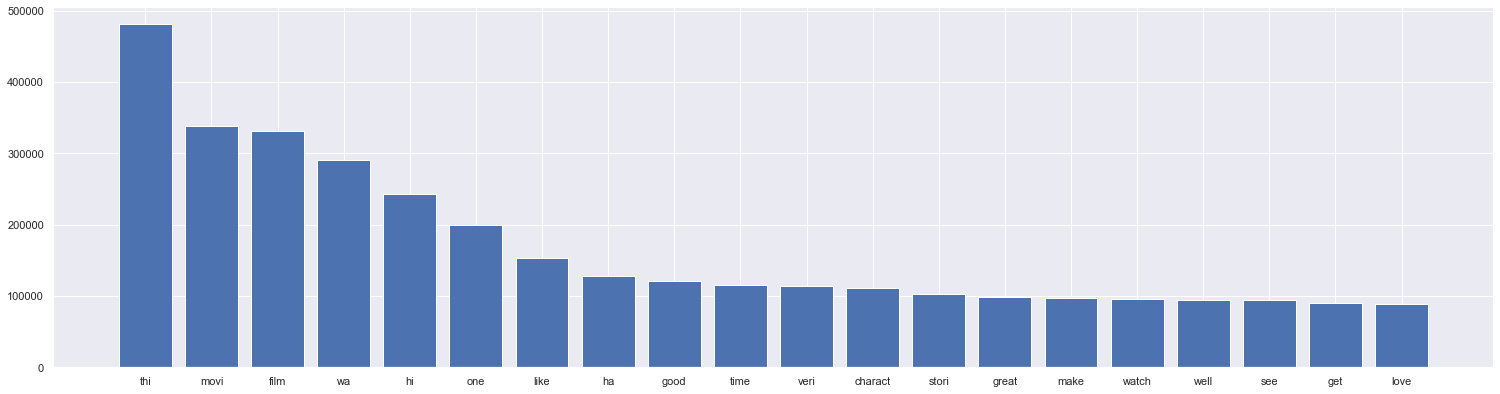

In [42]:
pos_words = ' '.join([text for text in new_df['new_review'][new_df['Sentiment'] == 'Positive']]).split()

pos_words_freq = {}
stop = list(stopwords.words('english'))

for word in pos_words:
  if word not in stop:
    if word not in pos_words_freq:
      pos_words_freq[word] = 1
    else:
      pos_words_freq[word] += 1


pos_words_freq = sorted(pos_words_freq.items(), key=lambda pos_words_freq: pos_words_freq[1], reverse=True)


pos_words_freq = pos_words_freq[:20]

plt.rcParams["figure.figsize"] = (20,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
freqs = []
values = []

for idx,value in enumerate(pos_words_freq):
  freqs.append(value[0])
  values.append(value[1])

ax.bar(freqs,values)
plt.show()